In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def read_pixel_values(file_path):
    with open(file_path, 'r') as file:
        pixel_values = file.read().split(', ')
        pixel_values = [int(val, 16) for val in pixel_values]
        print(len(pixel_values))
    return pixel_values

In [7]:
linhas = 144#60 #use 60 para a imagem completa
colunas = 176
file_path = 'image.txt'
dataArray = read_pixel_values(file_path)

# Monta o array da imagem a partir do formato RGB565             
#Monta o RGB
a=[0]*3
#Monta as Colunas
a=[a]*colunas
#Monta as Linhas
a=[a]*linhas
a = np.array(a, dtype=np.uint8)
#AlgorÃ­timo montado baseado nesse site:
#http://www.barth-dev.de/online/rgb565-color-picker/  
for x in range (0,linhas):
    for y in range (0,colunas):
        index = y+colunas*x
        pixel = dataArray[index]
        #invert byte order
        #pixel = ((dataArray[index]&0xFF)<<8)|(dataArray[index]>>8)
        #separa as cores
        R = pixel&0b1111100000000000
        G = pixel&0b0000011111100000
        B = pixel&0b0000000000011111
        #shift para a posição correta
        a[x,y,0] = R>>8
        a[x,y,1] = G>>3
        a[x,y,2] = B<<3

# Use PIL to create an image from the new array of pixels
new_image = Image.fromarray(a,"RGB")
new_image.save('new.png')

25344


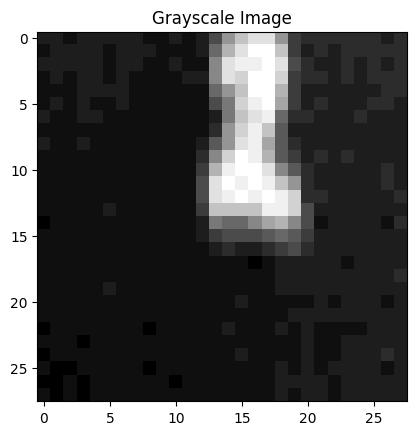

In [9]:
def display_grayscale_image(file_path, width, height):
    # Read the values from the text file
    with open(file_path, 'r') as file:
        content = file.read().split(', ')

    # Convert the values to a 2D NumPy array
    image_data = np.array([float(value) for value in content]).reshape(height, width)

    # Display the grayscale image
    plt.imshow(image_data, cmap='gray')
    plt.title('Grayscale Image')
    plt.show()

# Replace 'your_file.txt' with the actual file path, and specify the width and height of the image.
file_path = 'grayscale.txt'
image_width = 28  # Replace with the actual width of your image
image_height = 28  # Replace with the actual height of your image

display_grayscale_image(file_path, image_width, image_height)